In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import dataframe
df = pd.read_csv("E:\\Mozila Firefox\\train_data.csv")

In [3]:
df.head()

,id,txnrefid,custno,acctno,channelcode,overallqual,grlivarea,garagecars,ageofhouse,saleprice
0,1000,18ba263b-25c0-4b25-a57d-531c8a8098ff,12341198,45671880,LOAN,7,1710,2,17,208500
1,1001,5c154349-6e96-4785-ac9a-414bdc5017d6,12341086,45671557,LOAN,6,1262,2,44,181500
2,1002,43ef5bc1-2ec8-4e74-ac17-ac33b429a47e,12341187,45671158,LOAN,7,1786,2,19,223500
3,1003,b0e41298-a0c3-4a0f-8e54-6be5523cfeae,12341242,45671999,LOAN,7,1717,3,105,140000
4,1004,ba177687-6c1c-4548-9481-ccb9b25eea07,12341047,45671584,LOAN,8,2198,3,20,250000


In [4]:
df= df.drop(["txnrefid", "channelcode"], axis=1)
df.head()

,id,custno,acctno,overallqual,grlivarea,garagecars,ageofhouse,saleprice
0,1000,12341198,45671880,7,1710,2,17,208500
1,1001,12341086,45671557,6,1262,2,44,181500
2,1002,12341187,45671158,7,1786,2,19,223500
3,1003,12341242,45671999,7,1717,3,105,140000
4,1004,12341047,45671584,8,2198,3,20,250000


In [5]:
df.dtypes

id             int64
custno         int64
acctno         int64
overallqual    int64
grlivarea      int64
garagecars     int64
ageofhouse     int64
saleprice      int64
dtype: object

#### Find Optimal Clusters

In [6]:
"""
The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring
clusters and thus provides a way to assess parameters like number of clusters visually.
This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from
the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between
two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

"""


'\nThe silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring\nclusters and thus provides a way to assess parameters like number of clusters visually.\nThis measure has a range of [-1, 1].\n\nSilhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from\nthe neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between\ntwo neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.\n\n'

In [7]:
range_n_clusters = list (range(2,10))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6350548024810527)
For n_clusters = 3, silhouette score is 0.5611654792718056)
For n_clusters = 4, silhouette score is 0.5425475820576716)
For n_clusters = 5, silhouette score is 0.5379232473321439)
For n_clusters = 6, silhouette score is 0.537997387884636)
For n_clusters = 7, silhouette score is 0.5424998731549984)
For n_clusters = 8, silhouette score is 0.540722674487372)
For n_clusters = 9, silhouette score is 0.5336460382973585)


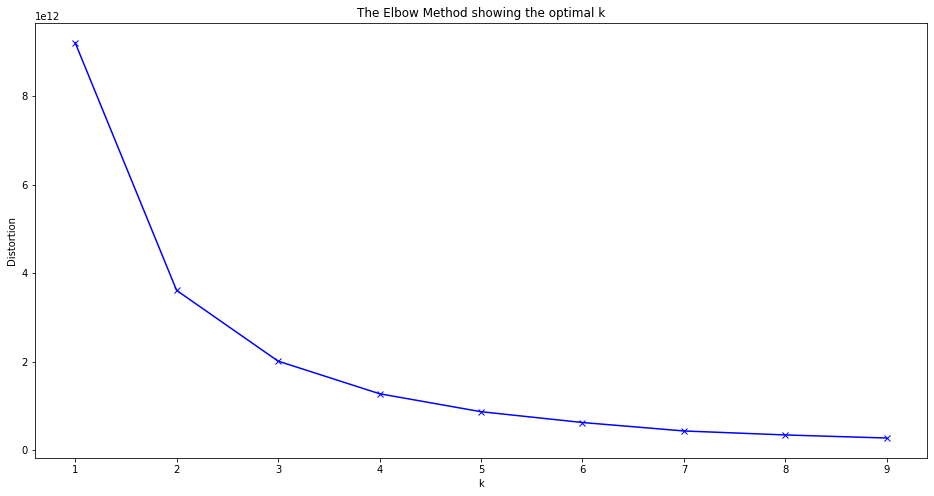

In [8]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.savefig("E://Graphs//elbow_curve.png")
plt.show()

#### K-Means 

In [9]:
km= KMeans(n_clusters=3)
y_predicted= km.fit_predict(df[["custno", "overallqual", "grlivarea", "garagecars", "ageofhouse", "saleprice"]])
y_predicted
df["cluster_no"]= y_predicted
df.head()

,id,custno,acctno,overallqual,grlivarea,garagecars,ageofhouse,saleprice,cluster_no
0,1000,12341198,45671880,7,1710,2,17,208500,1
1,1001,12341086,45671557,6,1262,2,44,181500,1
2,1002,12341187,45671158,7,1786,2,19,223500,1
3,1003,12341242,45671999,7,1717,3,105,140000,2
4,1004,12341047,45671584,8,2198,3,20,250000,1


In [10]:
# Import predicted price dataframe
pred_price = pd.read_csv("C:\\Users\\amirs\\OneDrive\\Documents\\predicted_price.csv")

In [11]:
# Convert Float to Int
pred_price["Predicted_SalePrice"]= pred_price["Predicted_SalePrice"].astype("int")

In [12]:
pred_price.head()

,id,custno,Predicted_SalePrice
0,1000,12341198,55955
1,1001,12341086,142433
2,1002,12341187,174208
3,1003,12341242,158303
4,1004,12341047,113756


In [13]:
df.head(5)

,id,custno,acctno,overallqual,grlivarea,garagecars,ageofhouse,saleprice,cluster_no
0,1000,12341198,45671880,7,1710,2,17,208500,1
1,1001,12341086,45671557,6,1262,2,44,181500,1
2,1002,12341187,45671158,7,1786,2,19,223500,1
3,1003,12341242,45671999,7,1717,3,105,140000,2
4,1004,12341047,45671584,8,2198,3,20,250000,1


In [14]:
# Merge Actual Price and Predicted Price to plot graphs
df = pd.merge(df,pred_price, on="id")
df.head(5)

,id,custno_x,acctno,overallqual,grlivarea,garagecars,ageofhouse,saleprice,cluster_no,custno_y,Predicted_SalePrice
0,1000,12341198,45671880,7,1710,2,17,208500,1,12341198,55955
1,1001,12341086,45671557,6,1262,2,44,181500,1,12341086,142433
2,1002,12341187,45671158,7,1786,2,19,223500,1,12341187,174208
3,1003,12341242,45671999,7,1717,3,105,140000,2,12341242,158303
4,1004,12341047,45671584,8,2198,3,20,250000,1,12341047,113756


In [15]:
pred_price.shape

(1460, 3)

In [16]:
df.shape

(1460, 11)

In [17]:
df1= df[df.cluster_no==0]
df2= df[df.cluster_no==1]
df3= df[df.cluster_no==2]
# df4= df[df.cluster_no==3]

In [18]:
df1.head()

,id,custno_x,acctno,overallqual,grlivarea,garagecars,ageofhouse,saleprice,cluster_no,custno_y,Predicted_SalePrice
6,1006,12341194,45671931,8,1694,2,16,307000,0,12341194,375953
11,1011,12341150,45671072,9,2324,3,15,345000,0,12341150,82029
20,1020,12341213,45671433,8,2376,3,15,325300,0,12341213,189291
27,1027,12341035,45671823,8,1704,3,13,306000,0,12341035,121743
35,1035,12341088,45671542,8,2452,3,16,309000,0,12341088,139497


In [19]:
# Linear Regression

In [20]:
# # Model Building
# from sklearn.linear_model import LinearRegression
# from sklearn import metrics
# from sklearn.model_selection import train_test_split

In [21]:
# # Prepare data for modeling
# X= df1.drop(["id", "custno", "acctno","saleprice", "cluster_no"], axis=1)
# y= df1.saleprice

# # Split the data and check the shape of the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [22]:
# # Instantiate the model
# linreg= LinearRegression()

# # Fit the model
# linreg.fit(X_train, y_train)

# # Make predictions
# pred_test = linreg.predict(X_test)

In [23]:
# # Get the coefficient and intercept of the model
# print(linreg.intercept_)
# print(linreg.coef_)

# # Pair the feature name with the coefficient
# print(list(zip(df1, linreg.coef_)))

# # Print R square
# print("R Square ", linreg.score(X_test, y_test))
# # So, in our model, 81.51% of the variability in Y can be explained using X.

# # Mean Absolute Deviation
# print("MAE:", metrics.mean_absolute_error(pred_test, y_test))

# # Mean Square Error
# print("MSE:", metrics.mean_squared_error(pred_test, y_test))

# # Root Mean square Error
# print("RMSE:", np.sqrt(metrics.mean_squared_error(pred_test, y_test)))

In [24]:
# pred_test.shape

In [25]:
# df1[["saleprice", "Predicted_SalePrice", "cluster_no"]].head(2)

In [26]:
# df2[["saleprice", "Predicted_SalePrice", "cluster_no"]].head(2)

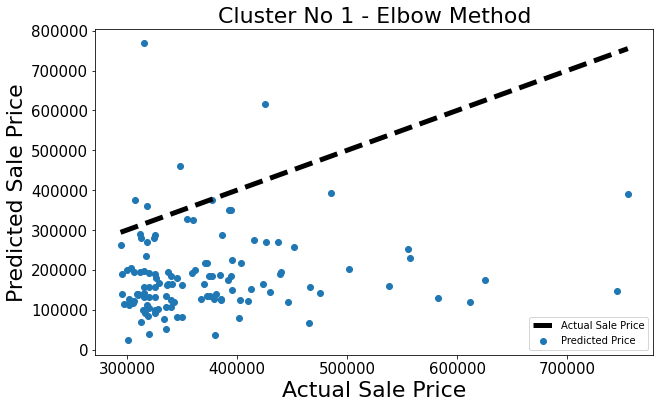

In [27]:
# plt.figure(figsize=(20,30))
fig, ax = plt.subplots(figsize=(10,6))
plt.title("Cluster No 1 - Elbow Method", fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=15) 
ax.scatter(df1["saleprice"], df1["Predicted_SalePrice"], label = "Predicted Price")
ax.plot([df1["saleprice"].min(), df1["saleprice"].max()],[df1["saleprice"].min(), df1["saleprice"].max()], 'k--', lw=5,
       label = "Actual Sale Price")
ax.set_xlabel('Actual Sale Price', fontsize=22)
ax.set_ylabel('Predicted Sale Price', fontsize=22)
plt.legend()
plt.savefig("E://Graphs//cluster1.png")
plt.show()

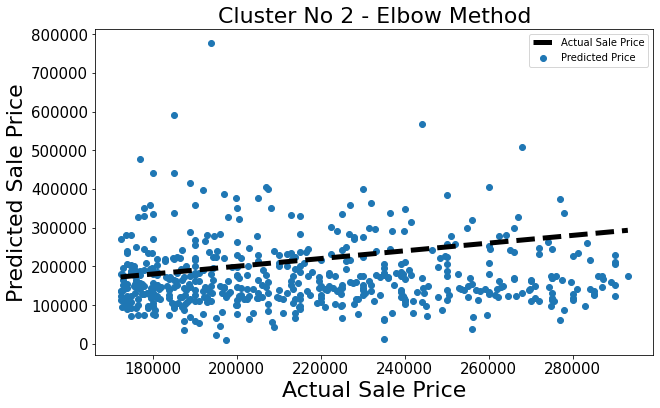

In [28]:
# plt.figure(figsize=(20,30))
fig, ax = plt.subplots(figsize=(10,6))
plt.title("Cluster No 2 - Elbow Method", fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=15) 
ax.scatter(df2["saleprice"], df2["Predicted_SalePrice"], label = "Predicted Price")
ax.plot([df2["saleprice"].min(), df2["saleprice"].max()],[df2["saleprice"].min(), df2["saleprice"].max()], 'k--', lw=5,
       label = "Actual Sale Price")
ax.set_xlabel('Actual Sale Price', fontsize=22)
ax.set_ylabel('Predicted Sale Price', fontsize=22)
plt.legend()
plt.savefig("E://Graphs//cluster2.png")
plt.show()

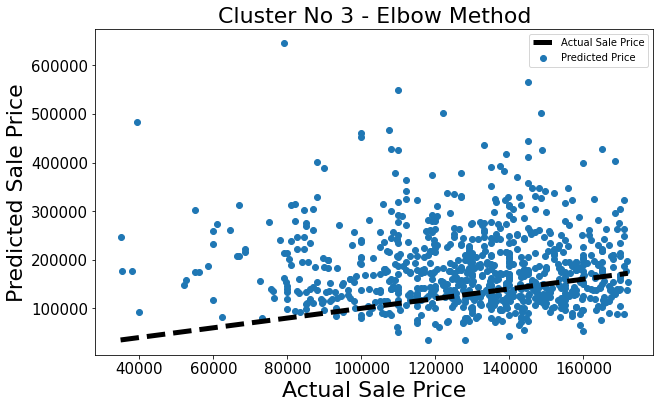

In [29]:
# plt.figure(figsize=(20,30))
fig, ax = plt.subplots(figsize=(10,6))
plt.title("Cluster No 3 - Elbow Method", fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=15) 
ax.scatter(df3["saleprice"], df3["Predicted_SalePrice"], label = "Predicted Price")
ax.plot([df3["saleprice"].min(), df3["saleprice"].max()],[df3["saleprice"].min(), df3["saleprice"].max()], 'k--', lw=5,
       label = "Actual Sale Price")
ax.set_xlabel('Actual Sale Price', fontsize=22)
ax.set_ylabel('Predicted Sale Price', fontsize=22)
plt.legend()
plt.savefig("E://Graphs//cluster3.png")
plt.show()

In [30]:
df1.describe()

,id,custno_x,acctno,overallqual,grlivarea,garagecars,ageofhouse,saleprice,cluster_no,custno_y,Predicted_SalePrice
count,120.000000,1.200000e+02,1.200000e+02,120.000000,120.000000,120.000000,120.000000,120.000000,120.0,1.200000e+02,120.000000
mean,1662.183333,1.234113e+07,4.567150e+07,8.458333,2317.808333,2.758333,24.025000,372625.941667,0.0,1.234113e+07,184664.308333
std,408.978744,7.006976e+01,3.103031e+02,0.878270,555.639057,0.429888,23.028467,84164.424605,0.0,7.006976e+01,106135.930112
min,1006.000000,1.234100e+07,4.567101e+07,7.000000,1419.000000,2.000000,10.000000,294000.000000,0.0,1.234100e+07,23968.000000
25%,1321.750000,1.234107e+07,4.567121e+07,8.000000,1893.750000,3.000000,13.000000,317750.000000,0.0,1.234107e+07,122820.750000
50%,1618.500000,1.234114e+07,4.567152e+07,8.000000,2229.000000,3.000000,15.000000,341821.500000,0.0,1.234114e+07,160953.000000
75%,1991.000000,1.234119e+07,4.567180e+07,9.000000,2624.000000,3.000000,25.000000,394712.750000,0.0,1.234119e+07,207417.250000
max,2442.000000,1.234125e+07,4.567200e+07,10.000000,4476.000000,3.000000,140.000000,755000.000000,0.0,1.234125e+07,767898.000000


In [31]:
# # Cluster 1 Analysis
# - Mean : The mean of overquall is is 8.45, grlivarea is 2317, garagecars 2.75, ageofhouse 24 years, saleprice 372625
# - Std dev : The std dev of overquall is 0.87, grlivarea is 555, garagecars 0.42, ageofhouse 23 years, saleprice 84164
# - Mode : The mode of overquall is 8, grlivarea is 1893, garagecars 3, ageofhouse 15 years, saleprice 341821

In [32]:
df2.describe()

,id,custno_x,acctno,overallqual,grlivarea,garagecars,ageofhouse,saleprice,cluster_no,custno_y,Predicted_SalePrice
count,539.000000,5.390000e+02,5.390000e+02,539.000000,539.000000,539.000000,539.000000,539.000000,539.0,5.390000e+02,539.000000
mean,1730.547310,1.234113e+07,4.567148e+07,6.842301,1741.467532,2.107607,30.977737,215244.376623,1.0,1.234113e+07,175555.840445
std,426.495156,7.174981e+01,2.931359e+02,0.866128,389.174382,0.463859,22.592796,33403.218548,0.0,7.174981e+01,84807.000584
min,1000.000000,1.234100e+07,4.567100e+07,4.000000,988.000000,0.000000,11.000000,172400.000000,1.0,1.234100e+07,9607.000000
25%,1337.500000,1.234106e+07,4.567122e+07,6.000000,1486.500000,2.000000,15.500000,185875.000000,1.0,1.234106e+07,121505.000000
50%,1746.000000,1.234113e+07,4.567147e+07,7.000000,1665.000000,2.000000,21.000000,208300.000000,1.0,1.234113e+07,154935.000000
75%,2108.500000,1.234118e+07,4.567173e+07,7.000000,1937.500000,2.000000,42.000000,239250.000000,1.0,1.234118e+07,209005.000000
max,2457.000000,1.234125e+07,4.567200e+07,10.000000,4676.000000,4.000000,140.000000,293077.000000,1.0,1.234125e+07,775919.000000


In [33]:
# # Cluster 2 Analysis
# - Mean : The mean of overquall is is 5.24, grlivarea is 1243, garagecars 1.38, ageofhouse 64 years, saleprice 129105
# - Std dev : The std dev of overquall is 0.96, grlivarea is 388, garagecars 0.69, ageofhouse 26 years, saleprice 26668
# - Mode : The mode of overquall is 5, grlivarea is 1180, garagecars 1, ageofhouse 61 years, saleprice 133000

In [34]:
df3.describe()

,id,custno_x,acctno,overallqual,grlivarea,garagecars,ageofhouse,saleprice,cluster_no,custno_y,Predicted_SalePrice
count,801.000000,8.010000e+02,8.010000e+02,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,8.010000e+02,801.000000
mean,1738.880150,1.234113e+07,4.567149e+07,5.245943,1243.182272,1.389513,64.380774,129105.011236,2.0,1.234113e+07,183979.283396
std,419.767993,7.206664e+01,2.913906e+02,0.966016,388.079227,0.691440,26.312945,26668.821030,0.0,7.206664e+01,81495.168320
min,1003.000000,1.234100e+07,4.567100e+07,1.000000,334.000000,0.000000,11.000000,34900.000000,2.0,1.234100e+07,35147.000000
25%,1390.000000,1.234106e+07,4.567124e+07,5.000000,971.000000,1.000000,48.000000,112500.000000,2.0,1.234106e+07,125890.000000
50%,1741.000000,1.234113e+07,4.567149e+07,5.000000,1180.000000,1.000000,61.000000,133000.000000,2.0,1.234113e+07,168627.000000
75%,2097.000000,1.234119e+07,4.567175e+07,6.000000,1440.000000,2.000000,81.000000,148500.000000,2.0,1.234119e+07,222871.000000
max,2459.000000,1.234125e+07,4.567200e+07,10.000000,5642.000000,4.000000,148.000000,172000.000000,2.0,1.234125e+07,644879.000000


In [35]:
# # Cluster 3 Analysis
# - Mean : The mean of overquall is is 6.84, grlivarea is 1741, garagecars 2.10, ageofhouse 30 years, saleprice 215244
# - Std dev : The std dev of overquall is 0.86, grlivarea is 389, garagecars 0.46, ageofhouse 22 years, saleprice 33403
# - Mode : The mode of overquall is 7, grlivarea is 1655, garagecars 2, ageofhouse 21 years, saleprice 239250

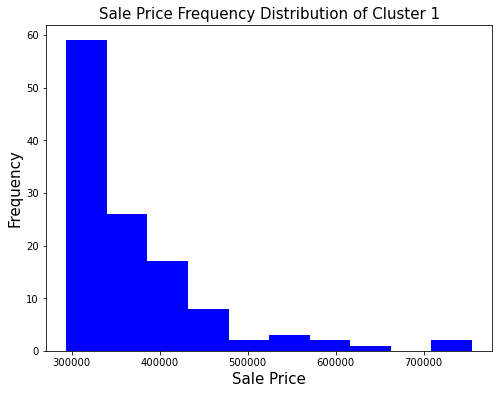

In [36]:
# Histogram of target variable
plt.figure(figsize=(8,6))
plt.xlabel("Sale Price", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Sale Price Frequency Distribution of Cluster 1", fontsize=15)
plt.hist(df1["saleprice"], color= "blue")
plt.savefig("E://Graphs//hist1.png")
plt.show()

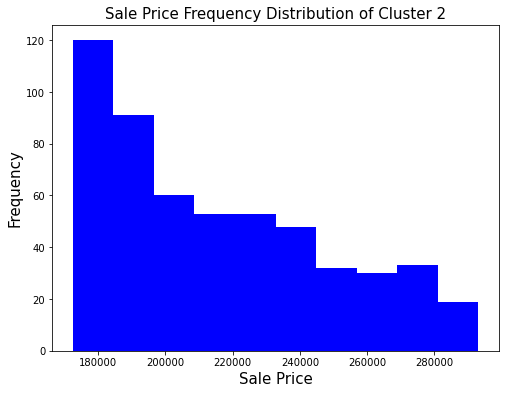

In [37]:
# Histogram of target variable
plt.figure(figsize=(8,6))
plt.xlabel("Sale Price", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Sale Price Frequency Distribution of Cluster 2", fontsize=15)
plt.hist(df2["saleprice"], color= "blue")
plt.savefig("E://Graphs//hist2.png")
plt.show()

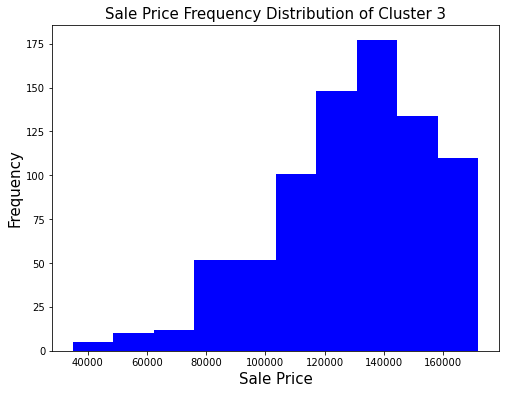

In [38]:
# Histogram of target variable
plt.figure(figsize=(8,6))
plt.xlabel("Sale Price", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Sale Price Frequency Distribution of Cluster 3", fontsize=15)
plt.hist(df3["saleprice"], color= "blue")
plt.savefig("E://Graphs//hist3.png")
plt.show()

# Random Forest Regression

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import seaborn as sns

In [40]:
# Import dataframe
df = pd.read_csv("E:\\Mozila Firefox\\train_data.csv")

In [41]:
df.head()

,id,txnrefid,custno,acctno,channelcode,overallqual,grlivarea,garagecars,ageofhouse,saleprice
0,1000,18ba263b-25c0-4b25-a57d-531c8a8098ff,12341198,45671880,LOAN,7,1710,2,17,208500
1,1001,5c154349-6e96-4785-ac9a-414bdc5017d6,12341086,45671557,LOAN,6,1262,2,44,181500
2,1002,43ef5bc1-2ec8-4e74-ac17-ac33b429a47e,12341187,45671158,LOAN,7,1786,2,19,223500
3,1003,b0e41298-a0c3-4a0f-8e54-6be5523cfeae,12341242,45671999,LOAN,7,1717,3,105,140000
4,1004,ba177687-6c1c-4548-9481-ccb9b25eea07,12341047,45671584,LOAN,8,2198,3,20,250000


In [42]:
x= df[["overallqual", "grlivarea", "garagecars", "ageofhouse"]]

In [43]:
y = df["saleprice"]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [45]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [47]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 22870.361731898236
Mean Squared Error: 1308423083.8956306
Root Mean Squared Error: 36172.131315359766


In [48]:
feature_list = list(x.columns)
feature_list

['overallqual', 'grlivarea', 'garagecars', 'ageofhouse']

In [49]:
for name, importance in zip(feature_list, regressor.feature_importances_):
    print(name, "=", importance)

overallqual = 0.6395328999281678
grlivarea = 0.23025269317897254
garagecars = 0.044701302925887636
ageofhouse = 0.0855131039669721


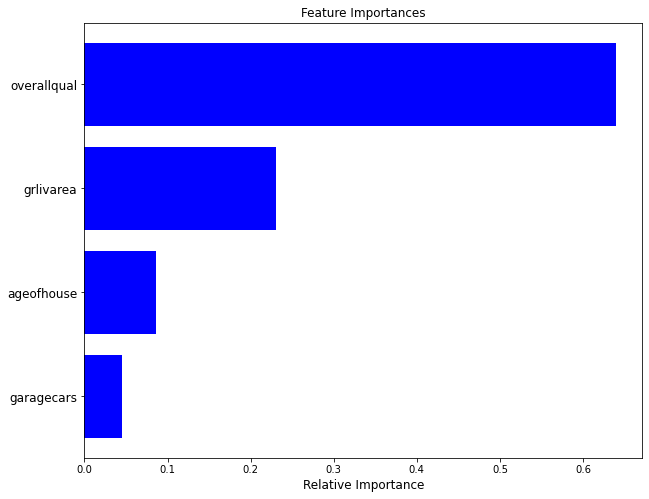

In [50]:
features = feature_list
importances = regressor.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('Feature Importances', fontsize= 12)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize=12)
plt.xlabel('Relative Importance', fontsize= 12)
plt.savefig("E://Graphs//Variable_Importance.png")
plt.show()